In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/version_final_NLP_project/

/content/drive/MyDrive/version_final_NLP_project


# 1\) Data analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


In [4]:
data_eng = pd.read_csv('subtask1/train/eng.csv')

In [5]:
data_eng = pd.read_csv('subtask1/train/eng.csv')
data_swa = pd.read_csv('subtask1/train/swa.csv')


In [7]:
print("English dataset: ")
print(f"\nDimensions of dataset: {data_eng.shape}")
print(f"Number total of instances: {len(data_eng)}")

# Class Distribution
print("\nDistribution of polarization class:")
class_dist = data_eng['polarization'].value_counts().sort_index()
for cls, count in class_dist.items():
    label = "Polarised" if cls == 1 else "Non-polarised"
    print(f"  - Class {cls} ({label}): {count} ({count/len(data_eng)*100:.2f}%)")


balance_ratio = class_dist.min() / class_dist.max()
print(f"\nBalanced ratio class: {balance_ratio:.2f}")

print("\n ")

print("\nSwahili dataset: ")
print(f"\nDimensions of dataset: {data_swa.shape}")
print(f"Number total of instances: {len(data_swa)}")

# Class Distribution
print("\nDistribution of polarization class:")
class_dist = data_swa['polarization'].value_counts().sort_index()
for cls, count in class_dist.items():
    label = "Polarised" if cls == 1 else "Non-polarised"
    print(f"  - Class {cls} ({label}): {count} ({count/len(data_swa)*100:.2f}%)")


balance_ratio = class_dist.min() / class_dist.max()
print(f"\nBalanced ratio class: {balance_ratio:.2f}")



English dataset: 

Dimensions of dataset: (3222, 3)
Number total of instances: 3222

Distribution of polarization class:
  - Class 0 (Non-polarised): 2047 (63.53%)
  - Class 1 (Polarised): 1175 (36.47%)

Balanced ratio class: 0.57

 

Swahili dataset: 

Dimensions of dataset: (6991, 3)
Number total of instances: 6991

Distribution of polarization class:
  - Class 0 (Non-polarised): 3487 (49.88%)
  - Class 1 (Polarised): 3504 (50.12%)

Balanced ratio class: 1.00


In [17]:
data_eng['text_length'] = data_eng['text'].astype(str).apply(len)
data_eng['word_count'] = data_eng['text'].astype(str).apply(lambda x: len(x.split()))

# Global statistic
print("\nlength text statistic:")
print(f"Mean: {data_eng['text_length'].mean():.2f}")
print(f"Median: {data_eng['text_length'].median():.2f}")
print(f"Min: {data_eng['text_length'].min()}")
print(f"Max: {data_eng['text_length'].max()}")
print(f"std: {data_eng['text_length'].std():.2f}")

print("\nNumber of words statistic:")
print(f"Mean: {data_eng['word_count'].mean():.2f}")
print(f"Median: {data_eng['word_count'].median():.2f}")
print(f"Min: {data_eng['word_count'].min()}")
print(f"Max: {data_eng['word_count'].max()}")

print("\nPolarization class:")
for cls in sorted(data_eng['polarization'].unique()):
    subset = data_eng[data_eng['polarization'] == cls]
    label = "Polarised" if cls == 1 else "Non-polarised"
    print(f"\n{label} (Classe {cls}):")
    print(f"Mean length: {subset['text_length'].mean():.2f} character")
    print(f"Mean words: {subset['word_count'].mean():.2f} words")





length text statistic:
Mean: 74.78
Median: 58.00
Min: 18
Max: 299
std: 47.39

Number of words statistic:
Mean: 12.26
Median: 9.00
Min: 4
Max: 60

Polarization class:

Non-polarised (Classe 0):
Mean length: 69.57 character
Mean words: 11.30 words

Polarised (Classe 1):
Mean length: 83.86 character
Mean words: 13.94 words


In [18]:
data_swa['text_length'] = data_swa['text'].astype(str).apply(len)
data_swa['word_count'] = data_swa['text'].astype(str).apply(lambda x: len(x.split()))

# Global statistic
print("\nlength text statistic:")
print(f"Mean: {data_swa['text_length'].mean():.2f}")
print(f"Median: {data_swa['text_length'].median():.2f}")
print(f"Min: {data_swa['text_length'].min()}")
print(f"Max: {data_swa['text_length'].max()}")
print(f"std: {data_swa['text_length'].std():.2f}")

print("\nNumber of words statistic:")
print(f"Mean: {data_swa['word_count'].mean():.2f}")
print(f"Median: {data_swa['word_count'].median():.2f}")
print(f"Min: {data_swa['word_count'].min()}")
print(f"Max: {data_swa['word_count'].max()}")

print("\nPolarization class:")
for cls in sorted(data_swa['polarization'].unique()):
    subset = data_swa[data_swa['polarization'] == cls]
    label = "Polarised" if cls == 1 else "Non-polarised"
    print(f"\n{label} (Classe {cls}):")
    print(f"Mean length: {subset['text_length'].mean():.2f} character")
    print(f"Mean words: {subset['word_count'].mean():.2f} words")





length text statistic:
Mean: 79.68
Median: 74.00
Min: 14
Max: 400
std: 38.66

Number of words statistic:
Mean: 12.54
Median: 12.00
Min: 2
Max: 48

Polarization class:

Non-polarised (Classe 0):
Mean length: 82.36 character
Mean words: 12.83 words

Polarised (Classe 1):
Mean length: 77.01 character
Mean words: 12.25 words


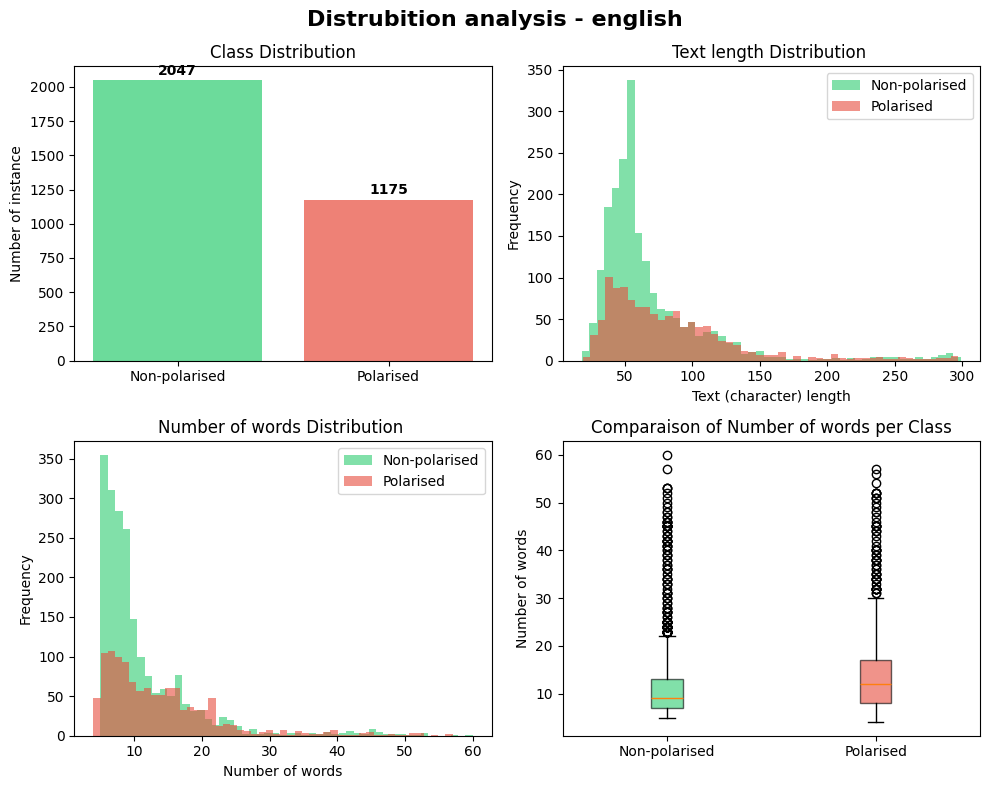

In [19]:
def distribution_visualization(df, language):
    """Distribution visualization"""

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle(f'Distrubition analysis - {language}',
                 fontsize=16, fontweight='bold')

    # Distribution des classes
    ax1 = axes[0, 0]
    class_counts = df['polarization'].value_counts().sort_index()
    labels = ['Non-polarised', 'Polarised']
    colors = ['#2ecc71', '#e74c3c']
    ax1.bar(range(len(class_counts)), class_counts.values, color=colors, alpha=0.7)
    ax1.set_xticks(range(len(class_counts)))
    ax1.set_xticklabels(labels)
    ax1.set_ylabel('Number of instance')
    ax1.set_title('Class Distribution')
    for i, v in enumerate(class_counts.values):
        ax1.text(i, v + max(class_counts.values)*0.02, str(v),
                ha='center', fontweight='bold')

    #Text length distribution
    ax2 = axes[0, 1]
    for cls, color, label in zip([0, 1], colors, labels):
        data = df[df['polarization'] == cls]['text_length']
        ax2.hist(data, bins=50, alpha=0.6, label=label, color=color)
    ax2.set_xlabel('Text (character) length')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Text length Distribution ')
    ax2.legend()

    # Words distribution
    ax3 = axes[1, 0]
    for cls, color, label in zip([0, 1], colors, labels):
        data = df[df['polarization'] == cls]['word_count']
        ax3.hist(data, bins=50, alpha=0.6, label=label, color=color)
    ax3.set_xlabel('Number of words')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Number of words Distribution ')
    ax3.legend()

    # Boxplot comparatif
    ax4 = axes[1, 1]
    data_to_plot = [
        df[df['polarization'] == 0]['word_count'],
        df[df['polarization'] == 1]['word_count']
    ]
    bp = ax4.boxplot(data_to_plot, labels=labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    ax4.set_ylabel('Number of words')
    ax4.set_title('Comparaison of Number of words per Class')

    plt.tight_layout()
    # filename = f'distribution_analysis_{language}.pdf'
    # plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.show()

distribution_visualization(data_eng, 'english')


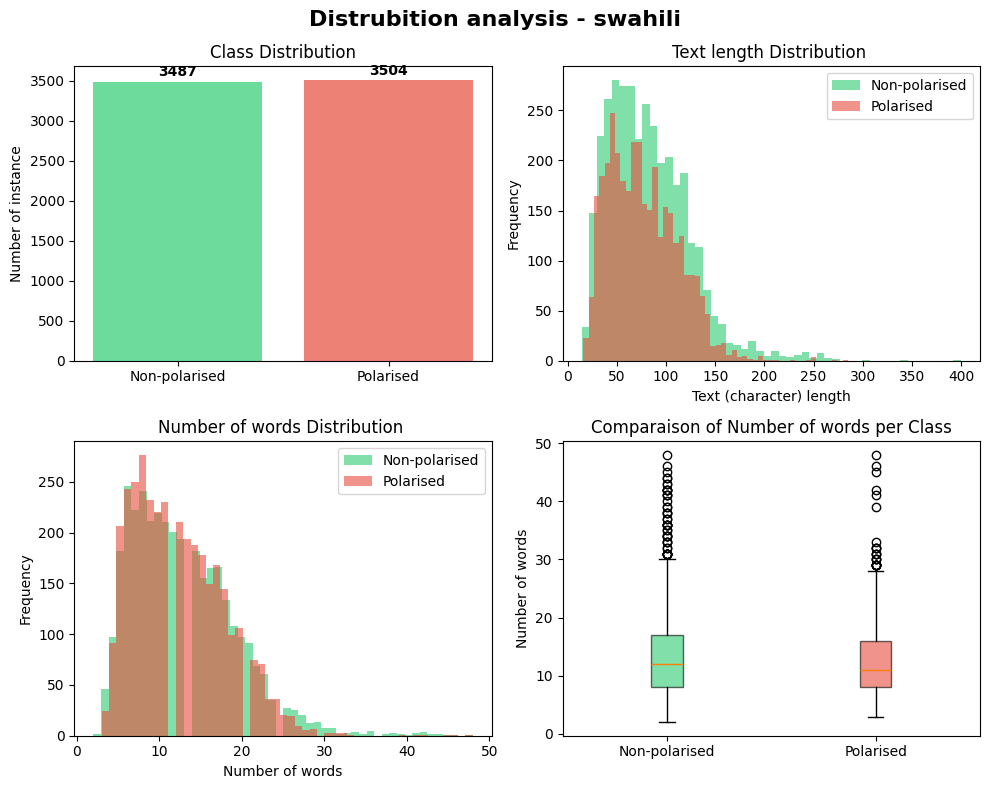

In [16]:
distribution_visualization(data_swa, 'swahili')

# 2\)Baseline model (starter)


## Import

In [ ]:
import pandas as pd

from sklearn.metrics import recall_score, precision_score, f1_score
import numpy as np

import torch

from sklearn.metrics import f1_score

from transformers import (
    AutoTokenizer,
    AutoConfig,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding
)
from torch.utils.data import Dataset

In [ ]:
import wandb

# Disable wandb logging for this script
wandb.init(mode="disabled")

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


## Loading data

In [ ]:
# Load the training and validation data for subtask 1

train = pd.read_csv('subtask1/train/eng.csv')
val = pd.read_csv('subtask1/train/eng.csv')

train.head()

,id,text,polarization
0,eng_973938b90b0ff5d87d35a582f83f5c89,is defending imperialism in the dnd chat,0
1,eng_07dfd4600426caca6e2c5883fcbea9ea,Still playing with this. I am now following Ra...,0
2,eng_f14519ff2302b6cd47712073f13bc461,.senate.gov Theres 3 groups out there Republic...,0
3,eng_e48b7e7542faafa544ac57b64bc80daf,"""ABC MD, David Anderson, said the additional f...",0
4,eng_7c581fb77bce8033aeba3d6dbd6273eb,"""bad people"" I have some conservative values s...",0


## Dataset

In [ ]:
# Fix the dataset class by inheriting from torch.utils.data.Dataset
class PolarizationDataset(torch.utils.data.Dataset):
  def __init__(self,texts,labels,tokenizer,max_length =128):
    self.texts=texts
    self.labels=labels
    self.tokenizer= tokenizer
    self.max_length = max_length # Store max_length

  def __len__(self):
    return len(self.texts)

  def __getitem__(self,idx):
    text=self.texts[idx]
    label=self.labels[idx]
    encoding=self.tokenizer(text,truncation=True,padding=False,max_length=self.max_length,return_tensors='pt')

    # Ensure consistent tensor conversion for all items
    item = {key: encoding[key].squeeze() for key in encoding.keys()}
    item['labels'] = torch.tensor(label, dtype=torch.long)
    return item

In [ ]:
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Create datasets
train_dataset = PolarizationDataset(train['text'].tolist(), train['polarization'].tolist(), tokenizer)
val_dataset = PolarizationDataset(val['text'].tolist(), val['polarization'].tolist(), tokenizer)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Load the model
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define metrics function
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {'f1_macro': f1_score(p.label_ids, preds, average='macro')}

# Define training arguments
training_args = TrainingArguments(
        output_dir=f"./arguments_subtask1/starter_model",
        num_train_epochs=3,
        learning_rate=2e-5,
        per_device_train_batch_size=64,
        per_device_eval_batch_size=8,
        eval_strategy="epoch",
        save_strategy="no",
        logging_steps=100,
        disable_tqdm=False
    )


In [ ]:
# Initialize the Trainer
trainer = Trainer(
    model=model,                         # the instantiated  Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,            # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
    data_collator=DataCollatorWithPadding(tokenizer) # Data collator for dynamic padding
)

# Train the model
trainer.train()

# Evaluate the model on the validation set
eval_results = trainer.evaluate()
print(f"Macro F1 score on validation set: {eval_results['eval_f1_macro']}")

Epoch,Training Loss,Validation Loss,F1 Macro
1,No log,0.434421,0.754660
2,0.493100,0.325457,0.846639
3,0.493100,0.287176,0.872463


Macro F1 score on validation set: 0.8724633856709327


In [ ]:
print("\n Saving model...")
trainer.save_model("./model_subtask1/starter_model")
tokenizer.save_pretrained("./model_subtask1/starter_model")



 Saving model...


('./model_subtask1/starter_model/tokenizer_config.json',
 './model_subtask1/starter_model/special_tokens_map.json',
 './model_subtask1/starter_model/vocab.txt',
 './model_subtask1/starter_model/added_tokens.json',
 './model_subtask1/starter_model/tokenizer.json')

## Prediction


In [ ]:
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

class InferenceDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {key: val.squeeze(0) for key, val in encoding.items()}

def predict(model_path, data_dev):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  print(f"Loading model from {model_path}...")
  print(f"Device: {device}")
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  model = AutoModelForSequenceClassification.from_pretrained(model_path)

  predict_dataset = InferenceDataset(data_dev['text'].tolist(), tokenizer)
  predict_loader = DataLoader(predict_dataset, batch_size=32, shuffle=False)


  model.to(device)
  model.eval()


  predictions = []

  print("Prediction in progress...")
  with torch.no_grad():
      for batch in tqdm(predict_loader):
          input_ids = batch['input_ids'].to(device)
          attention_mask = batch['attention_mask'].to(device)

          outputs = model(input_ids, attention_mask=attention_mask)
          preds = torch.argmax(outputs.logits, dim=1)

          predictions.extend(preds.cpu().numpy())

  data_dev['polarization'] = predictions

  return data_dev




In [ ]:
data_dev_eng = pd.read_csv('subtask1/dev/eng.csv')
model_path = "./model_subtask1/starter_model"
result_eng = predict(model_path, data_dev_eng)
pred_eng = result_eng[['id','polarization']]
#pred_eng.to_csv("./result_subtask1/pred_eng_starter_model.csv", index=False)


Loading model from ./model_subtask1/starter_model...
Device: cuda
Prediction in progress...


100%|██████████| 5/5 [00:01<00:00,  4.44it/s]


# 3\) Pipeline


In [ ]:
# @title Import
import pandas as pd

from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

import numpy as np

import torch
from transformers import (
    AutoTokenizer,
    AutoConfig,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding
)
from torch.utils.data import DataLoader, Dataset

In [ ]:
import wandb

# Disable wandb logging for this script
wandb.init(mode="disabled")

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


In [ ]:
# @title tokenizer and model pre-trained, Dataset function
def tokenize(model_name):
  tokenizer = AutoTokenizer.from_pretrained(model_name,normalization=True)
  return tokenizer

def model_pre_trained(model_name):
  model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
  return model

# Fix the dataset class by inheriting from torch.utils.data.Dataset
class PolarizationDataset(torch.utils.data.Dataset):
  def __init__(self,texts,labels,tokenizer,max_length =128):
    self.texts=texts
    self.labels=labels
    self.tokenizer= tokenizer
    self.max_length = max_length # Store max_length

  def __len__(self):
    return len(self.texts)

  def __getitem__(self,idx):
    text=self.texts[idx]
    label=self.labels[idx]
    encoding=self.tokenizer(text,truncation=True,padding=False,max_length=self.max_length,return_tensors='pt')

    # Ensure consistent tensor conversion for all items
    item = {key: encoding[key].squeeze() for key in encoding.keys()}
    item['labels'] = torch.tensor(label, dtype=torch.long)
    return item


In [ ]:
# @title metric and train_model function
# Define metrics function
def compute_metrics(p):
      preds = np.argmax(p.predictions, axis=1)
      return {'f1_macro': f1_score(p.label_ids, preds, average='macro')}

def train_model(train,val,output_arg, tokenizer, model):
  train_dataset = PolarizationDataset(train['text'].tolist(), train['polarization'].tolist(), tokenizer)
  val_dataset = PolarizationDataset(val['text'].tolist(), val['polarization'].tolist(), tokenizer)
  # Define training arguments
  training_args = TrainingArguments(
      output_dir=output_arg,
      num_train_epochs=5,
      learning_rate=2e-5,
      per_device_train_batch_size=16,
      gradient_accumulation_steps=4,
      per_device_eval_batch_size=32,

      eval_strategy="epoch",
      save_strategy="epoch",
      load_best_model_at_end=True,
      save_total_limit=1,

      metric_for_best_model="eval_f1_macro",
      greater_is_better=True,

      logging_strategy="epoch",
      fp16=True
  )


  trainer = Trainer(
      model=model,
      args=training_args,
      train_dataset=train_dataset,
      eval_dataset=val_dataset,
      compute_metrics=compute_metrics,
      data_collator=DataCollatorWithPadding(tokenizer)
  )


  # Train the model
  trainer.train()

  # Evaluate the model on the validation set
  eval_results = trainer.evaluate()
  print(f"Macro F1 score on validation set: {eval_results['eval_f1_macro']}")

  return trainer


In [ ]:
# @title save model function
def save_model(path_for_saving, trainer,tokenizer):
  print("\n Saving model...")
  trainer.save_model(path_for_saving)
  tokenizer.save_pretrained(path_for_saving)



In [ ]:
# @title prediction function
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

class InferenceDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {key: val.squeeze(0) for key, val in encoding.items()}

def predict(model_path, data_dev):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  print(f"Loading model from {model_path}...")
  print(f"Device: {device}")
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  model = AutoModelForSequenceClassification.from_pretrained(model_path)

  predict_dataset = InferenceDataset(data_dev['text'].tolist(), tokenizer)
  predict_loader = DataLoader(predict_dataset, batch_size=32, shuffle=False)


  model.to(device)
  model.eval()


  predictions = []

  print("Prediction in progress...")
  with torch.no_grad():
      for batch in tqdm(predict_loader):
          input_ids = batch['input_ids'].to(device)
          attention_mask = batch['attention_mask'].to(device)

          outputs = model(input_ids, attention_mask=attention_mask)
          preds = torch.argmax(outputs.logits, dim=1)

          predictions.extend(preds.cpu().numpy())

  data_dev['polarization'] = predictions

  return data_dev




In [25]:
# @title Load data
from sklearn.model_selection import train_test_split

data = pd.read_csv('subtask1/train/eng.csv')
train, val = train_test_split(
    data,
    test_size=0.15,
    stratify=data['polarization'],
    random_state=42
)



## 3.1\) BERTweeter model, for english

In [ ]:
# @title define tokenizer and model
model_name = "vinai/bertweet-base"
output_arg = "./arguments_subtask1/BertTweeter_model/argument_model"

tokenizer = tokenize(model_name)
model = model_pre_trained(model_name)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference

In [ ]:
# @title Train
trainer = train_model(train, val, output_arg, tokenizer, model)

Epoch,Training Loss,Validation Loss,F1 Macro
1,No log,0.144022,0.953838
2,0.188500,0.090751,0.973743
3,0.188500,0.063833,0.983890
4,0.086700,0.050574,0.988251
5,0.086700,0.046339,0.989601


Macro F1 score on validation set: 0.9896011742900117


In [ ]:
# @title save model
path_save = "./model_subtask1/BERTweeter_model/model_trained"
save_model(path_save,trainer, tokenizer)


 Saving model...


In [ ]:
# @title prediction
data_dev_eng = pd.read_csv('subtask1/dev/eng.csv')
model_path = "./model_subtask1/BERTweeter_model/model_trained"
result_eng = predict(model_path, data_dev_eng)
pred_eng = result_eng[['id','polarization']]
pred_eng.to_csv("./model_subtask1/BERTweeter_model/result_model/pred_eng_only.csv", index=False)


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Loading model from ./model_subtask1/BERTweeter_model/model_trained...
Device: cuda
Prediction in progress...


100%|██████████| 5/5 [00:01<00:00,  4.59it/s]


## 3.2\) XLM-Roberta for english

In [ ]:
# @title define tokenizer and model
model_name = "xlm-roberta-base"
output_arg = "./model_subtask1/XLM_r_model/argument_model"

tokenizer = tokenize(model_name)
model = model_pre_trained(model_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# @title train
trainer = train_model(train, val, output_arg, tokenizer, model)


A ConfigError was raised whilst setting the number of model parameters in Weights & Biases config.


Epoch,Training Loss,Validation Loss,F1 Macro
1,No log,0.520200,0.634359
2,0.596500,0.507317,0.754189
3,0.596500,0.404768,0.810391
4,0.457500,0.350870,0.836014
5,0.457500,0.345829,0.845816


Macro F1 score on validation set: 0.8458164237714211


In [ ]:
# @title save model
path_save = "./model_subtask1/XLM_r_model/model_trained"
save_model(path_save,trainer, tokenizer)


 Saving model...


In [ ]:
# @title prediction
data_dev_eng = pd.read_csv('subtask1/dev/eng.csv')
model_path = "./model_subtask1/XLM_r_model/model_trained"
result_eng = predict(model_path, data_dev_eng)
pred_eng = result_eng[['id','polarization']]
pred_eng.to_csv("./model_subtask1/XLM_r_model/result_model/pred_eng_only.csv", index=False)


Loading model from ./model_subtask1/XLM_r_model/model_trained...
Device: cuda


The tokenizer you are loading from './model_subtask1/XLM_r_model/model_trained' with an incorrect regex pattern: https://huggingface.co/mistralai/Mistral-Small-3.1-24B-Instruct-2503/discussions/84#69121093e8b480e709447d5e. This will lead to incorrect tokenization. You should set the `fix_mistral_regex=True` flag when loading this tokenizer to fix this issue.


Prediction in progress...


100%|██████████| 5/5 [00:01<00:00,  4.82it/s]


## 3.3\)Baseline for swahili with XLM-roberta base

In [ ]:
# @title Load data
from sklearn.model_selection import train_test_split

data = pd.read_csv('subtask1/train/swa.csv')
train, val = train_test_split(
    data,
    test_size=0.15,
    stratify=data['polarization'],
    random_state=42
)




In [ ]:
# @title define tokenizer and model
model_name = "xlm-roberta-base"
output_arg = "./model_subtask1/XLM_r_model_swa/argument_model"

tokenizer = tokenize(model_name)
model = model_pre_trained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# @title train
trainer = train_model(train, val, output_arg, tokenizer, model)


Epoch,Training Loss,Validation Loss,F1 Macro
1,0.596600,0.482370,0.757065
2,0.502000,0.418683,0.813318
3,0.449600,0.405717,0.807216
4,0.408400,0.341113,0.850928
5,0.371700,0.328935,0.852238


Macro F1 score on validation set: 0.8522378700748723


In [ ]:
# @title save model
path_save = "./model_subtask1/XLM_r_model_swa/model_trained"
save_model(path_save,trainer, tokenizer)


 Saving model...


In [ ]:
# @title prediction
data_dev_swa = pd.read_csv('subtask1/dev/swa.csv')
model_path = "./model_subtask1/XLM_r_model_swa/model_trained"
result_swa = predict(model_path, data_dev_swa)
pred_swa = result_swa[['id','polarization']]
pred_swa.to_csv("./model_subtask1/XLM_r_model_swa/result_model/pred_swa_only.csv", index=False)


Loading model from ./model_subtask1/XLM_r_model_swa/model_trained...
Device: cuda


The tokenizer you are loading from './model_subtask1/XLM_r_model_swa/model_trained' with an incorrect regex pattern: https://huggingface.co/mistralai/Mistral-Small-3.1-24B-Instruct-2503/discussions/84#69121093e8b480e709447d5e. This will lead to incorrect tokenization. You should set the `fix_mistral_regex=True` flag when loading this tokenizer to fix this issue.


Prediction in progress...


100%|██████████| 11/11 [00:02<00:00,  5.08it/s]


## 3.4\) XLM-Roberta English - Swahili

In [ ]:
# @title load data
data_eng = pd.read_csv('subtask1/train/eng.csv')
data_swa = pd.read_csv('subtask1/train/swa.csv')

train = pd.concat([data_eng,data_swa])
val = pd.concat([data_eng,data_swa])


In [ ]:
# @title define tokenizer and model
model_name = "xlm-roberta-base"
output_arg = "./model_subtask1/XLM_r_model_eng_swa/argument_model"

tokenizer = tokenize(model_name)
model = model_pre_trained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# @title train
trainer = train_model(train, val, output_arg, tokenizer, model)


Epoch,Training Loss,Validation Loss,F1 Macro
1,0.643200,0.494068,0.762496
2,0.502100,0.417077,0.800827
3,0.443300,0.363418,0.835062
4,0.403200,0.345359,0.840687
5,0.368200,0.311373,0.863394


Macro F1 score on validation set: 0.8633938880209541


In [ ]:
# @title save model
path_save = "./model_subtask1/XLM_r_model_eng_swa/model_trained"
save_model(path_save,trainer, tokenizer)


 Saving model...


In [ ]:
# @title prediction swahili
data_dev_swa = pd.read_csv('subtask1/dev/swa.csv')
model_path = "./model_subtask1/XLM_r_model_eng_swa/model_trained"
result_swa = predict(model_path, data_dev_swa)
pred_swa = result_swa[['id','polarization']]
pred_swa.to_csv("./model_subtask1/XLM_r_model_eng_swa/result_model/pred_swa.csv", index=False)


Loading model from ./model_subtask1/XLM_r_model_eng_swa/model_trained...
Device: cuda


The tokenizer you are loading from './model_subtask1/XLM_r_model_eng_swa/model_trained' with an incorrect regex pattern: https://huggingface.co/mistralai/Mistral-Small-3.1-24B-Instruct-2503/discussions/84#69121093e8b480e709447d5e. This will lead to incorrect tokenization. You should set the `fix_mistral_regex=True` flag when loading this tokenizer to fix this issue.


Prediction in progress...


100%|██████████| 11/11 [00:02<00:00,  4.32it/s]


In [ ]:
# @title prediction english
data_dev_eng = pd.read_csv('subtask1/dev/eng.csv')
model_path = "./model_subtask1/XLM_r_model_eng_swa/model_trained"
result_eng = predict(model_path, data_dev_eng)
pred_eng = result_eng[['id','polarization']]
pred_eng.to_csv("./model_subtask1/XLM_r_model_eng_swa/result_model/pred_eng.csv", index=False)


Loading model from ./model_subtask1/XLM_r_model_eng_swa/model_trained...
Device: cuda


The tokenizer you are loading from './model_subtask1/XLM_r_model_eng_swa/model_trained' with an incorrect regex pattern: https://huggingface.co/mistralai/Mistral-Small-3.1-24B-Instruct-2503/discussions/84#69121093e8b480e709447d5e. This will lead to incorrect tokenization. You should set the `fix_mistral_regex=True` flag when loading this tokenizer to fix this issue.


Prediction in progress...


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


## 3.6 \)Data augmentation by using other language

In [ ]:
# @title Load data
print(" Loading training data...")
datasets = {
    'eng': pd.read_csv('subtask1/train/eng.csv'),
    'swa': pd.read_csv('subtask1/train/swa.csv'),
    'deu': pd.read_csv('subtask1/train/deu.csv'),
    'pol': pd.read_csv('subtask1/train/pol.csv'),
    'rus': pd.read_csv('subtask1/train/rus.csv'),
    'spa': pd.read_csv('subtask1/train/spa.csv'),
    'arb': pd.read_csv('subtask1/train/arb.csv'),
    'ita': pd.read_csv('subtask1/train/ita.csv'),
    'tur': pd.read_csv('subtask1/train/tur.csv'),
    'fas': pd.read_csv('subtask1/train/fas.csv'),
    'zho': pd.read_csv('subtask1/train/zho.csv'),
    'ben': pd.read_csv('subtask1/train/ben.csv'),
    'pan': pd.read_csv('subtask1/train/pan.csv'),
    'hau': pd.read_csv('subtask1/train/hau.csv'),
    'hin': pd.read_csv('subtask1/train/hin.csv')
}

for lang, df in datasets.items():
    print(f"  {lang}: {len(df)} samples")

# Concatenate data
df_all = pd.concat(datasets.values(), ignore_index=True)
print(f"\nTotal samples: {len(df_all)}")
df_all['polarization'].value_counts()


 Loading training data...
  eng: 3222 samples
  swa: 6991 samples
  deu: 3180 samples
  pol: 2391 samples
  rus: 3348 samples
  spa: 3305 samples
  arb: 3380 samples
  ita: 3334 samples
  tur: 2364 samples
  fas: 3295 samples
  zho: 4280 samples
  ben: 3333 samples
  pan: 1700 samples
  hau: 3651 samples
  hin: 2744 samples

Total samples: 50518


,count
polarization,
0,27043
1,23475


In [ ]:
train = pd.concat(datasets.values(), ignore_index=True)
val = pd.concat(datasets.values(), ignore_index=True)


In [ ]:
# @title define tokenizer and model
model_name = "xlm-roberta-base"
output_arg = "./model_subtask1/XLM_r_model_data_augmented/argument_model"

tokenizer = tokenize(model_name)
model = model_pre_trained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# @title train
trainer = train_model(train, val, output_arg, tokenizer, model)


Epoch,Training Loss,Validation Loss,F1 Macro
1,0.538800,0.427735,0.800970
2,0.428900,0.329633,0.850846
3,0.363100,0.268558,0.884905
4,0.304600,0.214789,0.911960
5,0.263400,0.189028,0.924017


Macro F1 score on validation set: 0.9240171204453388


In [ ]:
# @title save model
path_save = "./model_subtask1/XLM_r_model_data_augmented/model_trained"
save_model(path_save,trainer, tokenizer)


 Saving model...


In [ ]:
# @title prediction swahili
data_dev_swa = pd.read_csv('subtask1/dev/swa.csv')
model_path = "./model_subtask1/XLM_r_model_data_augmented/model_trained"
result_swa = predict(model_path, data_dev_swa)
pred_swa = result_swa[['id','polarization']]
pred_swa.to_csv("./model_subtask1/XLM_r_model_data_augmented/result_model/pred_swa.csv", index=False)


Loading model from ./model_subtask1/XLM_r_model_data_augmented/model_trained...
Device: cuda


The tokenizer you are loading from './model_subtask1/XLM_r_model_data_augmented/model_trained' with an incorrect regex pattern: https://huggingface.co/mistralai/Mistral-Small-3.1-24B-Instruct-2503/discussions/84#69121093e8b480e709447d5e. This will lead to incorrect tokenization. You should set the `fix_mistral_regex=True` flag when loading this tokenizer to fix this issue.


Prediction in progress...


100%|██████████| 11/11 [00:02<00:00,  4.42it/s]


In [ ]:
# @title prediction english
data_dev_eng = pd.read_csv('subtask1/dev/eng.csv')
model_path = "./model_subtask1/XLM_r_model_data_augmented/model_trained"
result_eng = predict(model_path, data_dev_eng)
pred_eng = result_eng[['id','polarization']]
pred_eng.to_csv("./model_subtask1/XLM_r_model_data_augmented/result_model/pred_eng.csv", index=False)


Loading model from ./model_subtask1/XLM_r_model_data_augmented/model_trained...
Device: cuda


The tokenizer you are loading from './model_subtask1/XLM_r_model_data_augmented/model_trained' with an incorrect regex pattern: https://huggingface.co/mistralai/Mistral-Small-3.1-24B-Instruct-2503/discussions/84#69121093e8b480e709447d5e. This will lead to incorrect tokenization. You should set the `fix_mistral_regex=True` flag when loading this tokenizer to fix this issue.


Prediction in progress...


100%|██████████| 5/5 [00:01<00:00,  3.85it/s]


In [ ]:
# @title Threshold tuning
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def optimize_threshold(model_path, data_val):
    """
    Test different threshold.
    """

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f" model {model_path} from {device}...")

    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    model.to(device)
    model.eval()

    eval_dataset = InferenceDataset(data_val['text'].tolist(), tokenizer)
    eval_loader = DataLoader(eval_dataset, batch_size=32, shuffle=False)

    all_probs = []
    true_labels = data_val['polarization'].tolist()


    print(" Calcul of probability (Inférence)...")
    with torch.no_grad():
        for batch in tqdm(eval_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)

            probs = F.softmax(outputs.logits, dim=1)

            all_probs.extend(probs[:, 1].cpu().numpy())

    all_probs = np.array(all_probs)
    true_labels = np.array(true_labels)

    results = []

    thresholds_to_test = np.arange(0.1, 0.95, 0.05)

    for thresh in thresholds_to_test:
        preds = (all_probs > thresh).astype(int)

        precision = precision_score(true_labels, preds, zero_division=0)
        recall = recall_score(true_labels, preds, zero_division=0)
        f1 = f1_score(true_labels, preds, zero_division=0)
        acc = accuracy_score(true_labels, preds)

        results.append({
            "Seuil": round(thresh, 2),
            "F1 Score (Pos)": round(f1, 4),
            "Recall": round(recall, 4),
            "Precision": round(precision, 4),
            "Accuracy": round(acc, 4)
        })

    df_results = pd.DataFrame(results)

    df_results = df_results.sort_values(by="F1 Score (Pos)", ascending=False)

    print(df_results.to_string(index=False))

    return df_results


In [ ]:
val = pd.read_csv('subtask1/train/eng.csv')
model_path = "./model_subtask1/XLM_r_model_data_augmented/model_trained"
optimize_threshold(model_path, val)

In [ ]:
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from tqdm import tqdm

class InferenceDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {key: val.squeeze(0) for key, val in encoding.items()}

def predict(model_path, data_dev, threshold):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Loading model from {model_path}...")
    print(f"Device: {device}")

    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)

    predict_dataset = InferenceDataset(data_dev['text'].tolist(), tokenizer)
    predict_loader = DataLoader(predict_dataset, batch_size=32, shuffle=False)

    model.to(device)
    model.eval()

    final_predictions = []

    print(f"Prediction in progress with Threshold = {threshold}...")

    with torch.no_grad():
        for batch in tqdm(predict_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)

            probs = F.softmax(outputs.logits, dim=1)

            proba_positive = probs[:, 1]

            preds = (proba_positive > threshold).int()

            final_predictions.extend(preds.cpu().numpy())

    data_dev['polarization'] = final_predictions

    return data_dev

In [ ]:
data_dev_eng = pd.read_csv('subtask1/dev/eng.csv')
model_path = "./model_subtask1/XLM_r_model_data_augmented/model_trained"
result_eng = predict(model_path, data_dev_eng,0.45)
pred_eng = result_eng[['id','polarization']]
pred_eng.to_csv("./model_subtask1/XLM_r_model_data_augmented/result_model/pred_eng_thershold.csv", index=False)


Loading model from ./model_subtask1/XLM_r_model_data_augmented/model_trained...
Device: cuda


The tokenizer you are loading from './model_subtask1/XLM_r_model_data_augmented/model_trained' with an incorrect regex pattern: https://huggingface.co/mistralai/Mistral-Small-3.1-24B-Instruct-2503/discussions/84#69121093e8b480e709447d5e. This will lead to incorrect tokenization. You should set the `fix_mistral_regex=True` flag when loading this tokenizer to fix this issue.


Prediction in progress with Threshold = 0.45...


100%|██████████| 5/5 [00:00<00:00,  5.01it/s]
